In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy.integrate import quad
from scipy.special import factorial

In [10]:
arr = np.array([
    [-1.30, -1.00, -0.70, -0.40, -0.10, 0.20, 0.50, 0.80, 1.10, 1.40],
    [-57.23, -8.20, 16.19, 26.56, 27.24, 22.30, 16.14, 12.65, 17.21, 45.38]
])


# 1 task
1.2

Метод Гаусса — это интерполяционный метод, основанный на использовании конечных разностей для построения полинома. В этом методе таблица считается с постоянным шагом h, а многочлен строится исходя из центральной точки таблицы.
Метод Гаусса подходит для случаев, когда точка интерполяции находится внутри таблицы, ближе к её центру.

метод Гаусса применим, так как между х шаг одинаковый - 0.3

$$P(x) = y_0 + q \Delta y_0 + \frac{q (q-1)}{2!} \Delta^2 y_0 + \frac{q (q-1) (q+1)}{3!} \Delta^3 y_{-1} + \dots$$

Но метод Гаусса предназначен для локальной интерполяции в окрестности одной точки, я выбрал центральную и далее продлил на весь интервал


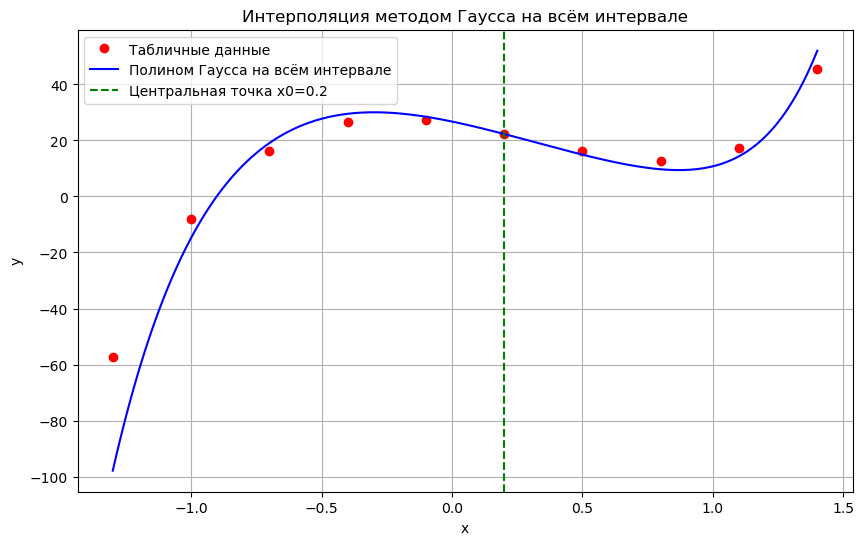

In [20]:
x = arr[0]
y = arr[1]
central_index = len(x) // 2
x0 = x[central_index]
y0 = y[central_index]

h = np.mean(np.diff(x))

n = len(x)
diff_table = np.zeros((n, n))
diff_table[:, 0] = y

for j in range(1, n):
    for i in range(n - j):
        diff_table[i, j] = diff_table[i + 1, j - 1] - diff_table[i, j - 1]

def gaussian_polynomial(x_val):
    q = (x_val - x0) / h
    poly = y0  
    q_product = 1

    for k in range(1, n):
        if k % 2 == 1:
            idx = central_index - k//2
        else:
            idx = central_index + k//2

        q_product *= (q - (-1)**(k-1) * (k//2))
        poly += (q_product / factorial(k)) * diff_table[central_index - k//2, k]

    return poly

x_dense = np.linspace(min(x), max(x), 200)
y_gauss = np.array([gaussian_polynomial(xi) for xi in x_dense])

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='Табличные данные')
plt.plot(x_dense, y_gauss, 'b-', label='Полином Гаусса на всём интервале')
plt.axvline(x0, color='green', linestyle='--', label=f'Центральная точка x0={x0}')
plt.legend()
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Интерполяция методом Гаусса на всём интервале')
plt.show()


# 2 task
2.7

Метод средних прямоугольников основан на приближении функции на каждом шаге h постоянной, равной значению функции в середине отрезка. Формула для вычисления определенного интеграла:

$$\int_{a}^{b} f(x) \,dx \approx h \sum_{i=0}^{N-1} f\left(\frac{x_i + x_{i+1}}{2}\right)$$


Численное интегрирование (метод средних прямоугольников): 31.56509
Аналитический интеграл полинома Гаусса: 31.49091
Погрешность: 7.41799e-02


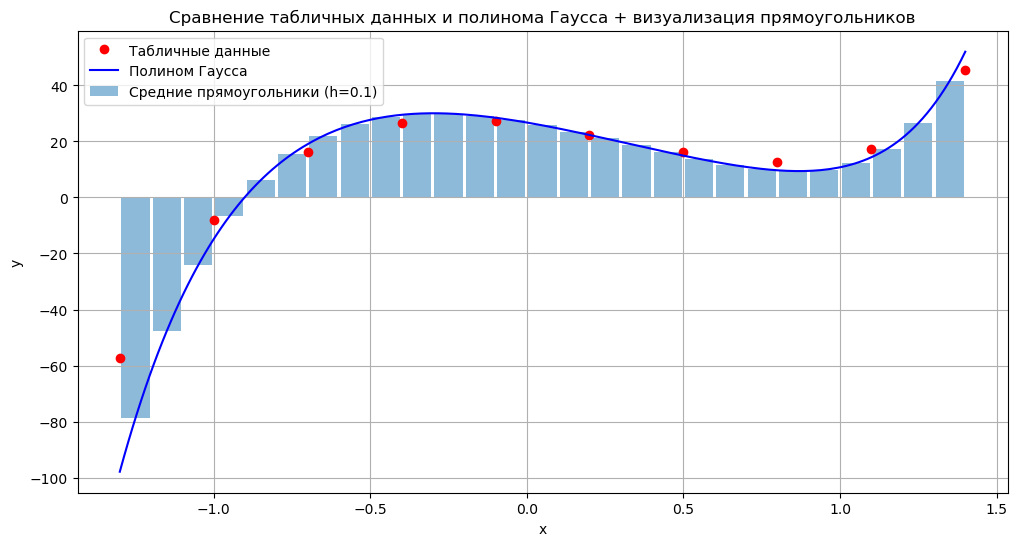

In [21]:
# часть данных взята из task1

a, b = x[0], x[-1]
step = 0.1

x_midpoints = np.arange(a + step/2, b, step)
y_midpoints = np.array([gaussian_polynomial(xi) for xi in x_midpoints])
integral_rectangles = np.sum(y_midpoints) * step


integral_analytical, _ = quad(gaussian_polynomial, a, b)


error = np.abs(integral_analytical - integral_rectangles)


print(f"Численное интегрирование (метод средних прямоугольников): {integral_rectangles:.5f}")
print(f"Аналитический интеграл полинома Гаусса: {integral_analytical:.5f}")
print(f"Погрешность: {error:.5e}")


x_dense = np.linspace(a, b, 200)
y_dense = np.array([gaussian_polynomial(xi) for xi in x_dense])

plt.figure(figsize=(12, 6))
plt.plot(x, y, 'ro', label='Табличные данные')
plt.plot(x_dense, y_dense, 'b-', label='Полином Гаусса')
plt.bar(x_midpoints, y_midpoints, width=0.09, alpha=0.5, label='Средние прямоугольники (h=0.1)', align='center')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.title('Сравнение табличных данных и полинома Гаусса + визуализация прямоугольников')
plt.show()


# task 3
3.5

In [34]:
import numpy as np
import sympy as sp

def divided_diff_table(x, y):
    n = len(y)
    coef = np.zeros([n, n])
    coef[:,0] = y
    
    for j in range(1, n):
        for i in range(n - j):
            coef[i][j] = (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j] - x[i])
    
    return coef[0]

def newton_polynomial(x_vals, coef, x):
    n = len(coef)
    poly = coef[0]
    term = 1
    for i in range(1, n):
        term *= (x - x_vals[i-1])
        poly += coef[i] * term
    return sp.simplify(poly)

x_vals = np.array([-0.8, -0.5, -0.2, 0, 0.2, 0.4, 0.7, None, 0.9, 1])
y_vals = np.array([2.756, 0.373, None, 1, 1.566, 1.983, 2.362, 2.52, 2.775, 3.2])

known_x = np.array([-0.8, -0.5, 0, 0.2, 0.4, 0.7, 0.9, 1])
known_y = np.array([2.756, 0.373, 1, 1.566, 1.983, 2.362, 2.775, 3.2])

coefs = divided_diff_table(known_x, known_y)
poly_expr = newton_polynomial(known_x, coefs, sp.Symbol('x'))

missing_x_values = [-0.2] 
missing_y_values = [poly_expr.subs(sp.Symbol('x'), x_val).evalf() for x_val in missing_x_values]

for x_val, y_val in zip(missing_x_values, missing_y_values):
    print(f"f({x_val}) = {y_val}")

print(poly_expr)

# Найдем перебором значение x, для которого y = 2.52
er0 = 1
for i in list(np.linspace(0.7, 0.9, 100)):
    er = np.abs(poly_expr.subs(sp.Symbol('x'), i).evalf() - 2.52)
    if er < er0:
        er0 = er
        x0 = i
print("f(x) = 2.52, ", f"x = {x0}")

f(-0.2) = 0.448090372148859
0.127489267311892*x**7 + 0.125670638625789*x**6 + 0.0159060537795162*x**5 + 3.8869621614078*x**4 - 4.97001945222533*x**3 + 0.0204500923826289*x**2 + 2.99354123871771*x + 1.0
f(x) = 2.52,  x = 0.798989898989899


# task 4

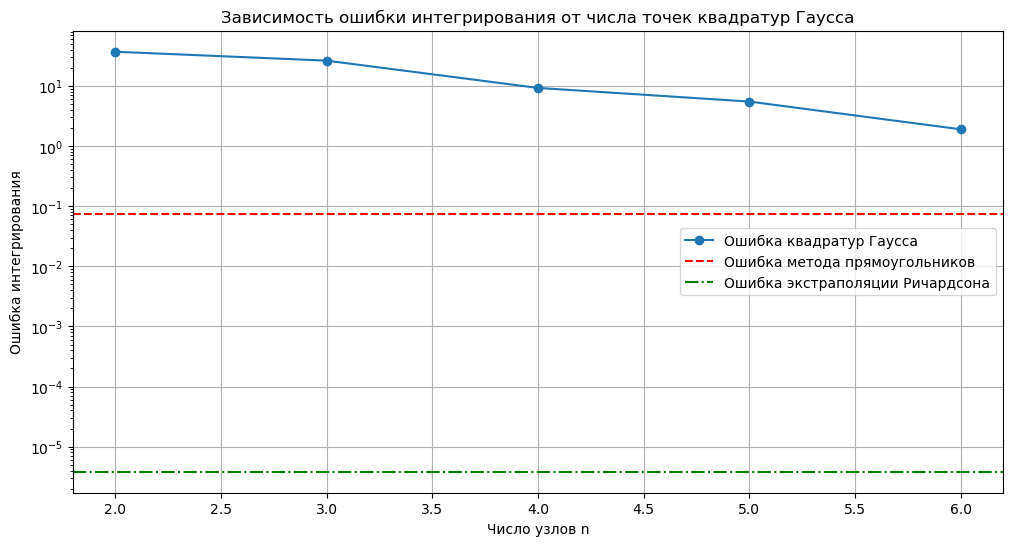

Численное интегрирование (метод средних прямоугольников): 31.56509
Аналитический интеграл: 31.49091
Ошибка метода средних прямоугольников: 7.41799e-02
Оценка ошибки по правилу Рунге: 1.85459e-02
Интеграл с экстраполяцией Ричардсона: 31.49090
Ошибка экстраполяции Ричардсона: 3.82821e-06
Ошибка квадратур Гаусса при n=2: 3.70351e+01
Ошибка квадратур Гаусса при n=3: 2.63296e+01
Ошибка квадратур Гаусса при n=4: 9.26222e+00
Ошибка квадратур Гаусса при n=5: 5.49268e+00
Ошибка квадратур Гаусса при n=6: 1.89857e+00


In [22]:
h_half = step / 2
x_mid_half = np.arange(a + h_half/2, b, h_half)
y_mid_half = np.array([gaussian_polynomial(xi) for xi in x_mid_half])
integral_half = np.sum(y_mid_half) * h_half

p = 2 
error_runge = np.abs(integral_half - integral_rectangles) / (2**p - 1)

integral_richardson = (2**p * integral_half - integral_rectangles) / (2**p - 1)
error_richardson = np.abs(integral_analytical - integral_richardson)


from scipy.special import roots_legendre

def gauss_quadrature(n):
    nodes, weights = roots_legendre(n)
    # Преобразуем к интервалу [a, b]
    mapped_nodes = 0.5 * (nodes * (b - a) + (b + a))
    integral_gauss = np.sum(weights * gaussian_polynomial(mapped_nodes)) * 0.5 * (b - a)
    return integral_gauss

n_values = [2, 3, 4, 5, 6]
errors_gauss = []

for n in n_values:
    integral_n = gauss_quadrature(n)
    errors_gauss.append(np.abs(integral_analytical - integral_n))

plt.figure(figsize=(12, 6))
plt.plot(n_values, errors_gauss, 'o-', label='Ошибка квадратур Гаусса')
plt.axhline(error, color='red', linestyle='--', label='Ошибка метода прямоугольников')
plt.axhline(error_richardson, color='green', linestyle='-.', label='Ошибка экстраполяции Ричардсона')
plt.yscale('log')
plt.xlabel('Число узлов n')
plt.ylabel('Ошибка интегрирования')
plt.legend()
plt.grid(True)
plt.title('Зависимость ошибки интегрирования от числа точек квадратур Гаусса')
plt.show()

# Вывод результатов
print(f"Численное интегрирование (метод средних прямоугольников): {integral_rectangles:.5f}")
print(f"Аналитический интеграл: {integral_analytical:.5f}")
print(f"Ошибка метода средних прямоугольников: {error:.5e}")
print(f"Оценка ошибки по правилу Рунге: {error_runge:.5e}")
print(f"Интеграл с экстраполяцией Ричардсона: {integral_richardson:.5f}")
print(f"Ошибка экстраполяции Ричардсона: {error_richardson:.5e}")
for n, err in zip(n_values, errors_gauss):
    print(f"Ошибка квадратур Гаусса при n={n}: {err:.5e}")
